Anda adalah data scientist di sebuah perusahaan bernama PT. Kumpulan. PT. Kumpulan adalah sebuah perusahaan berita online di Indonesia. UI desainer dan Penulis Berita ingin membuat beberapa perubahan dalam format buletinnya untuk meningkatkan lalu lintas di situs web mereka. Eksperimen dilakukan dengan membandingkan buletin asli yang dinamai produk A dan produk B yang berisi beberapa perubahan dalam bahasa dan layout buletin. Kedua buletin memiliki warna, dan topik yang sama. 

Tujuan mereka di sini adalah untuk memeriksa buletin mana yang membawa lalu lintas lebih tinggi di situs web, yaitu tingkat konversi. Ekseperimen ini dilakukan selama 30 hari untuk memantau tingkat konversi dimasing-masing buletin. Kamu sebagai data scientist mendapat pekerjaan untuk menguji hasil eksperimen tersebut.

# Import Library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as ss

import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
df= pd.read_csv('data.csv')

In [3]:
df

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19
5,6,0.13,0.17
6,7,0.14,0.18
7,8,0.23,0.20
8,9,0.11,0.17
9,10,0.15,0.22


In [4]:
df2 = df.melt(value_vars=["Conversion_A","Conversion_B"], ignore_index = False)
df2

,variable,value
0,Conversion_A,0.15
1,Conversion_A,0.12
2,Conversion_A,0.18
3,Conversion_A,0.19
4,Conversion_A,0.17
5,Conversion_A,0.13
6,Conversion_A,0.14
7,Conversion_A,0.23
8,Conversion_A,0.11
9,Conversion_A,0.15


<AxesSubplot:xlabel='variable', ylabel='value'>

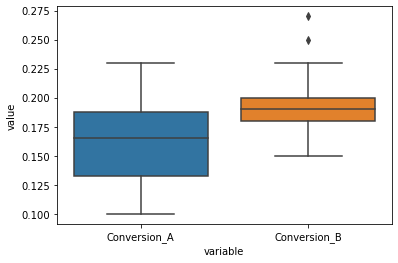

In [5]:
sns.boxplot(x = 'variable', y = "value", data = df2)

<BarContainer object of 2 artists>

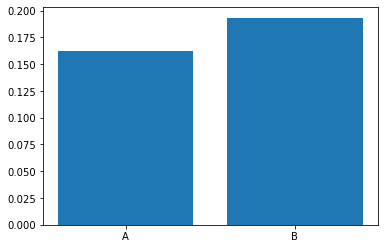

In [6]:
x = ['A', 'B']
value = [df.Conversion_A.mean(), df.Conversion_B.mean()]
plt.bar(x, value)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Conversion_A', ylabel='Density'>

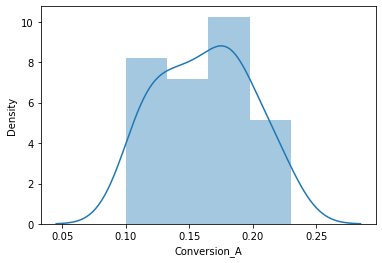

In [7]:
sns.distplot(df.Conversion_A)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Conversion_B', ylabel='Density'>

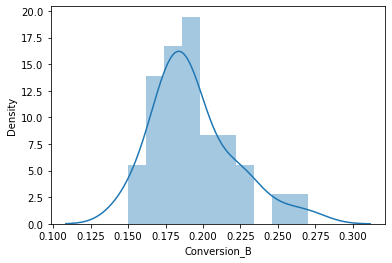

In [8]:
sns.distplot(df.Conversion_B)

# Do Hypothesis Testing

H0: Conversion rate B <= Coversion rate A <br>
H1: Conversion rate B > Coversion rate A

In [9]:
t_stat, p_value = ss.ttest_ind(df.Conversion_B, df.Conversion_A)
t_stat, p_value

(3.78736793091929, 0.000363796012828762)

Berdasarkan pengujian statistik dapat diketahui bahwa P-Value < 0.05 maka Menolak H0. Artinya Page B lebih baik digunakan dibandingkan Page A. Karena Conversion rate B > Conversion rate A